In [213]:
#Part 1 reading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lb = LabelEncoder()
# Read the data
data = pd.read_csv('./data/insurance.csv')
print(data)

          age     sex     bmi  children smoker     region      charges
0          19  female  27.900         0    yes  southwest  16884.92400
1          18    male  33.770         1     no  southeast   1725.55230
2          28    male  33.000         3     no  southeast   4449.46200
3          33    male  22.705         0     no  northwest  21984.47061
4          32    male  28.880         0     no  northwest   3866.85520
...       ...     ...     ...       ...    ...        ...          ...
1333       50    male  30.970         3     no  northwest  10600.54830
1334       18  female  31.920         0     no  northeast   2205.98080
1335       18  female  36.850         0     no  southeast   1629.83350
1336       21  female  25.800         0     no  southwest   2007.94500
1337       61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [214]:
# Part 2.1
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0       age   1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [215]:
#Part 2.2 
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:ylabel='count'>

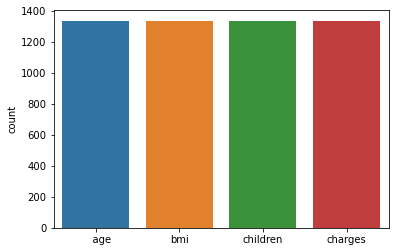

In [216]:
#Part 3.1
sns.countplot(data=data)

<AxesSubplot:xlabel='sex', ylabel='charges'>

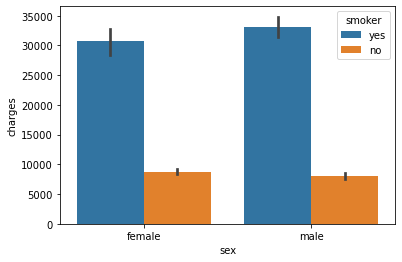

In [217]:
# Part 3.2
sns.barplot(data=data, x="sex", y="charges", hue="smoker")

In [218]:
#Part 4
data.isnull().sum()
data = data.dropna()
print(data)

          age     sex     bmi  children smoker     region      charges
0          19  female  27.900         0    yes  southwest  16884.92400
1          18    male  33.770         1     no  southeast   1725.55230
2          28    male  33.000         3     no  southeast   4449.46200
3          33    male  22.705         0     no  northwest  21984.47061
4          32    male  28.880         0     no  northwest   3866.85520
...       ...     ...     ...       ...    ...        ...          ...
1333       50    male  30.970         3     no  northwest  10600.54830
1334       18  female  31.920         0     no  northeast   2205.98080
1335       18  female  36.850         0     no  southeast   1629.83350
1336       21  female  25.800         0     no  southwest   2007.94500
1337       61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [219]:
#Part 5 & 6
data['sex'] = lb.fit_transform(data['sex'])
data['region'] = lb.fit_transform(data['region'])
data['smoker'] = lb.fit_transform(data['smoker'])

In [220]:
#Part 7
print(data)

          age  sex     bmi  children  smoker  region      charges
0          19    0  27.900         0       1       3  16884.92400
1          18    1  33.770         1       0       2   1725.55230
2          28    1  33.000         3       0       2   4449.46200
3          33    1  22.705         0       0       1  21984.47061
4          32    1  28.880         0       0       1   3866.85520
...       ...  ...     ...       ...     ...     ...          ...
1333       50    1  30.970         3       0       1  10600.54830
1334       18    0  31.920         0       0       0   2205.98080
1335       18    0  36.850         0       0       2   1629.83350
1336       21    0  25.800         0       0       3   2007.94500
1337       61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


<AxesSubplot:>

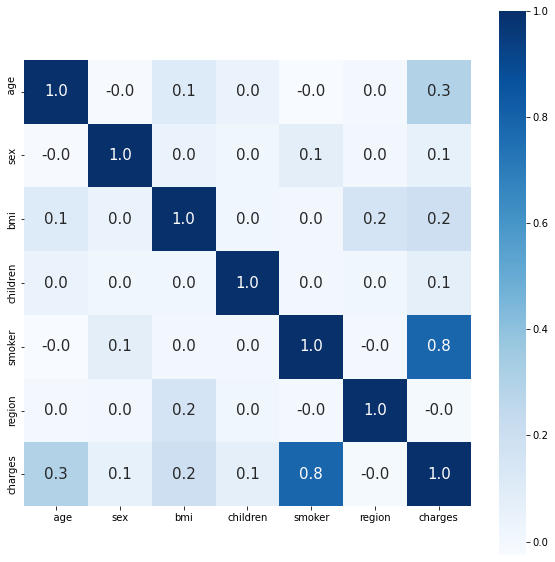

In [221]:
#Part 8
corr = data.corr()
plt.figure(figsize=(10,10))

sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 15}, cmap='Blues')

In [222]:
#Part 9 
x = data.drop('charges', axis=1)
x = x.drop('sex', axis=1)
y= data['charges']
x_train, x_test, y_train, y_test = train_test_split(x, data['charges'], test_size=0.3, random_state=42)

In [223]:
#Part 10
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)


In [224]:
#Part 11
from sklearn.metrics import mean_squared_error, r2_score

# Mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

# R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

print(lr.coef_)

print(lr.intercept_)

Mean squared error: 33764476.59420975
R-squared score: 0.7697211527941855
[  261.57526754   344.64669751   425.16370304 23627.06251225
  -328.35187084]
-12308.689430378461


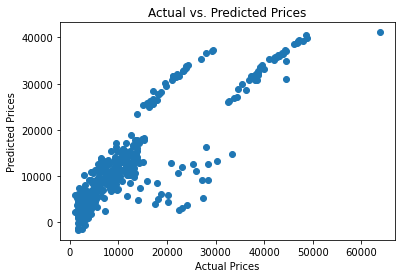

In [225]:
#Part 12
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

<AxesSubplot:xlabel='charges'>

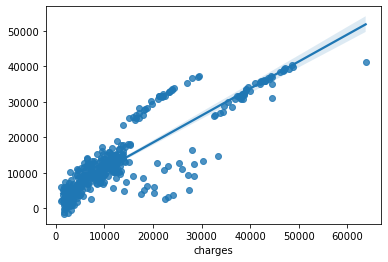

In [226]:
#Part 13 
sns.regplot(data=data, x=y_test, y=y_pred)

In [227]:
#Part 14
print(lr.predict([[19, 25, 2, 1, 2]]))

[25098.09426719]


/home/aftab/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
